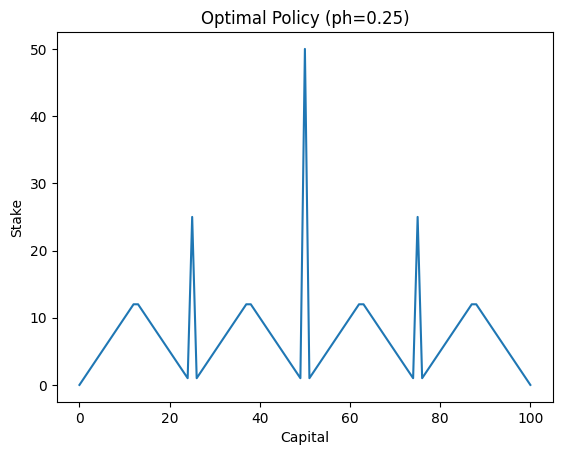

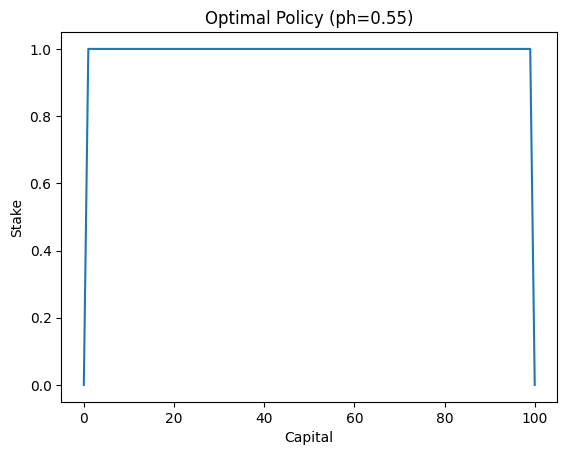

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(ph, theta=1e-9):
    V = np.zeros(101)
    V[100] = 1.0
    policy = np.zeros(101, dtype=int)
    
    while True:
        delta = 0
        for s in range(1, 100):
            possible_actions = range(1, min(s, 100 - s) + 1)
            if not possible_actions:
                continue
            max_value = -1
            best_action = 0
            for a in possible_actions:
                win_state = s + a
                win_reward = 1.0 if win_state >= 100 else V[win_state]
                lose_state = s - a
                lose_reward = 0.0 if lose_state <= 0 else V[lose_state]
                expected = ph * win_reward + (1 - ph) * lose_reward
                if expected > max_value:
                    max_value = expected
                    best_action = a
            delta = max(delta, abs(V[s] - max_value))
            V[s] = max_value
            policy[s] = best_action
        if delta < theta:
            break
    return policy

# 运行并绘图
for ph in [0.25, 0.55]:
    policy = value_iteration(ph)
    plt.figure()
    plt.plot(range(101), policy)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.title(f'Optimal Policy (ph={ph})')
    plt.show()

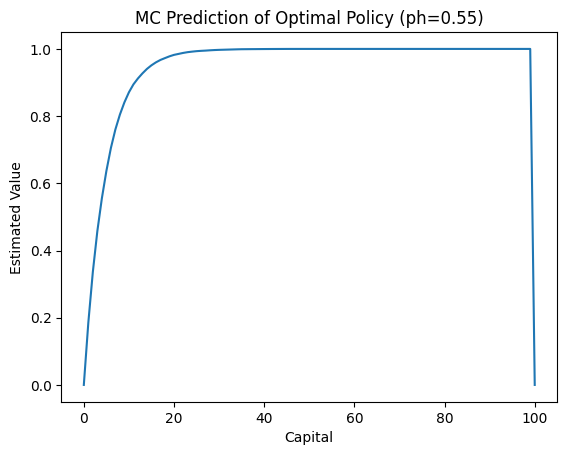

In [4]:
def mc_prediction(policy, ph, num_episodes=100000):
    sum_returns = np.zeros(101)
    count_visits = np.zeros(101, dtype=int)
    
    for _ in range(num_episodes):
        s = np.random.randint(1, 100)
        episode_states = []
        current_s = s
        while True:
            episode_states.append(current_s)
            a = policy[current_s]
            if np.random.rand() < ph:
                next_s = current_s + a
            else:
                next_s = current_s - a
            if next_s >= 100:
                reward = 1
                break
            elif next_s <= 0:
                reward = 0
                break
            current_s = next_s
        for s_visited in episode_states:
            sum_returns[s_visited] += reward
            count_visits[s_visited] += 1
    
    V_mc = np.zeros(101)
    for s in range(101):
        if count_visits[s] > 0:
            V_mc[s] = sum_returns[s] / count_visits[s]
    return V_mc

# 使用ph=0.55的最优策略运行MC预测
policy_ph55 = value_iteration(0.55)
V_mc = mc_prediction(policy_ph55, 0.55, num_episodes=100000)

# 绘制结果
plt.plot(range(101), V_mc)
plt.xlabel('Capital')
plt.ylabel('Estimated Value')
plt.title('MC Prediction of Optimal Policy (ph=0.55)')
plt.show()